<a href="https://colab.research.google.com/github/vedanttule134/Netflix-Movies-And-TV-Shows-Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies And TV Shows Clustering**





##### **Project Type**    - Unsupervised
##### **Contribution**    - Team data warehouse
##### **Team Member 1 -**  Vedant Tule
##### **Team Member 2 -**  Lovpreet Singh


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

**In this project, you are required to do**

**• Exploratory Data Analysis**

**• Understanding what type content is available in different countries**

**• If Netflix has been increasingly focusing on TV rather than movies in recent years.**

**• Clustering similar content by matching text-based features**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [89]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [90]:
# Load Dataset
url='https://drive.google.com/file/d/1xJGllnE12mAggLuRo8b0oNSshUlG8GvF/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
actual_df = pd.read_csv(url)
df = actual_df.copy()

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

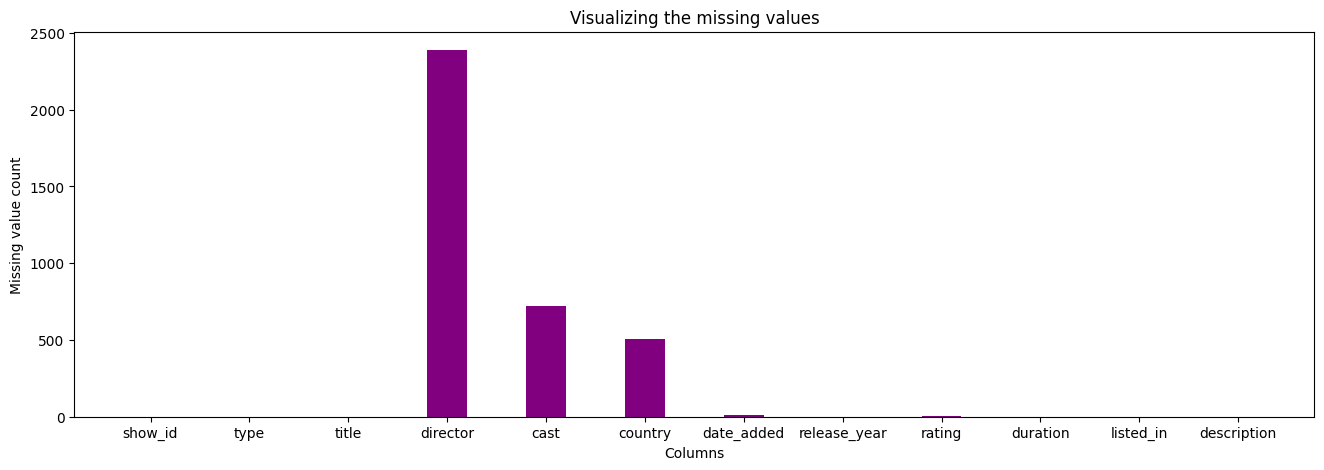

In [8]:
# Visualizing the missing values
courses = list(df.columns)
values = list(df.isnull().sum())
fig = plt.figure(figsize = (16, 5))
plt.bar(courses, values, color ='purple',
        width = 0.4)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

The dataset has around 7787 rows and 12 columns. In columns like director, cast, country, date_added and rating there are several NaN values that we need to take care. Apart from that 11 columns out of 12 are categorical columns. We need to clean this data in order to make it ready for Exploratory Data Analysis.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genre
12. **description**: The Summary description

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

show_id: 7787
type: 2
title: 7787
director: 4049
cast: 6831
country: 681
date_added: 1565
release_year: 73
rating: 14
duration: 216
listed_in: 492
description: 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [3]:
# Write your code to make your dataset analysis ready.
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

In Data Wrangling, we have to make our data EDA ready. For this we have fill all the missing values.

* We filled the missing values by creating a new category 'Unknown' for columns like director', 'cast', 'country'.

* For column 'rating' we filled it with the mode value of the columns.

Now after filling all the missing values we are good to proceed with the Data Visualization and EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1**

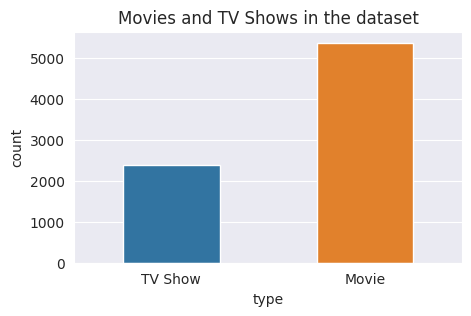

In [6]:
# Chart - 1 visualization code
# Count plot for Number of Movies and TV Shows in the dataset
plt.subplots(figsize=(5, 3))

# Set the style to darkgrid
sns.set_style("darkgrid")

sns.countplot(x='type', data=df, width = 0.5)
plt.title('Movies and TV Shows in the dataset')
plt.show()

In [22]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

**The count of Movie is more than double the count of TV Show. Here are the following insights:**
1. The netflix viewers might have a higher demand for movies as compared to TV Show.
2. Most of the Movies might not be the Netflix original movies, they might have bought the copyrights for the Movie to stream on their platform.
3. Movies have a wide range of audience from all age group whereas TV Shows are mostly preferred by Young genration of the age group of 16 to 25 years.

#### **Chart - 2**

In [7]:
# Chart - 2 visualization code
# Excluding the Unknown values which we filled while data wrangling
filtered_df = df[df['director'] != 'Unknown']

In [8]:
# Chart - 2 visualization code
# Filtering the top 10 directors
top_10_directors = filtered_df['director'].value_counts().head(10)
top_10_directors = top_10_directors.reset_index()
top_10_directors.columns = ['director', 'count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Raúl Campos, Jan Suter'),
  Text(1, 0, 'Marcus Raboy'),
  Text(2, 0, 'Jay Karas'),
  Text(3, 0, 'Cathy Garcia-Molina'),
  Text(4, 0, 'Youssef Chahine'),
  Text(5, 0, 'Martin Scorsese'),
  Text(6, 0, 'Jay Chapman'),
  Text(7, 0, 'Steven Spielberg'),
  Text(8, 0, 'David Dhawan'),
  Text(9, 0, 'Ryan Polito')])

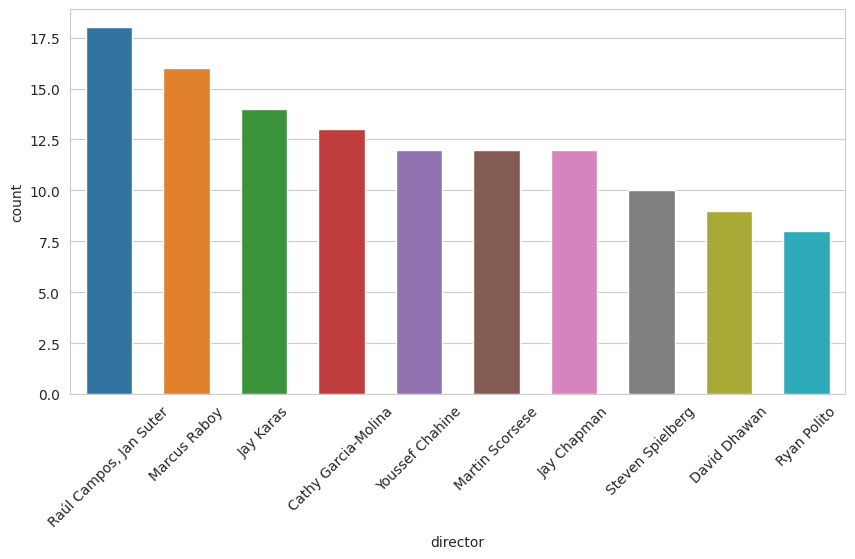

In [9]:
# plotting Barplot for the top 10 directors
# Set the style to whitegrid
sns.set_style("whitegrid")

plt.subplots(figsize=(10, 5))
sns.barplot(x='director', y='count', data=top_10_directors, width = 0.6)

# Rotating the x-axis tick labels bu 345 degree
plt.xticks(rotation=45)

**In this, we plotted a bar graph for top 10 directors who has directed the most number of movies/TV Show. Here are the following insights:**


1. Raúl Campos and Jan Suter are the directors who have directed most number of movies i.e. 18 which is more than any other directors.
2. Marcus Raboy has done 16 movies which is the second highest and Jay Karas has done 14 movies which is the third highest among all the directors in the dataset.

#### **Chart - 3**

Text(0.5, 1.0, ' Top 10 countries with the highest number of Movies/TV Shows')

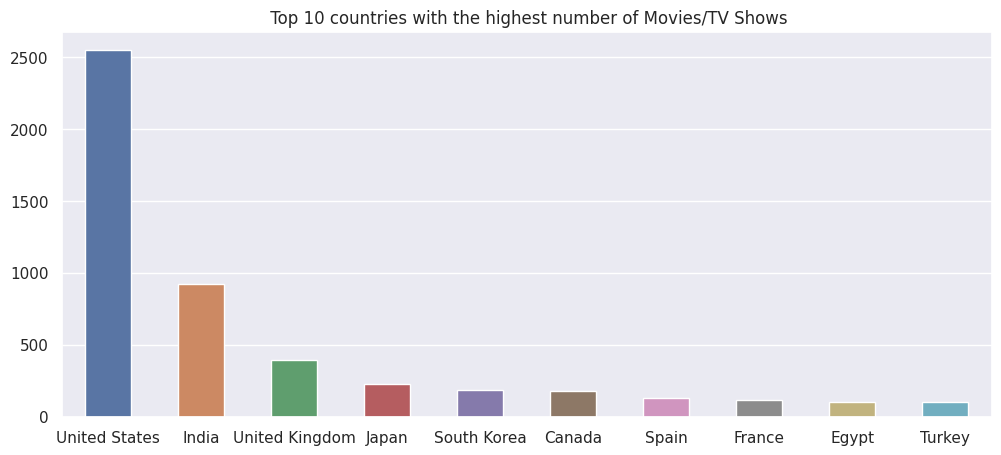

In [10]:
# Chart - 3 visualization code
# Excluding 'Unkown' values before
plt.figure(figsize=(12,5))
top_10_countries = df[~(df['country']=='Unknown')].country.value_counts().nlargest(10)

# Set the style to darkgrid
sns.set(style="darkgrid")

# Plotting top 10 countries with the highest number of Movies/TV Shows
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, width = 0.5)
plt.title(' Top 10 countries with the highest number of Movies/TV Shows')

**In this, we plotted a bar graph for Top 10 countries with the highest number of Movies/TV Shows. Here are the following insights:**

1. United States is the leading producer of Movies/TV Shows in the world. Around 2500 Movies/TV Shows on Netflix are are from United States.
2. India is the second largest country in producing the number of Movies/TV Shows in the world. There are approximately 900 Movies/TV Shows listed on the Netflix platform are from India.
3. United Kingdom is the third largest and South Korea is fourth largest producer of Movies/TV Shows on Netflix. Other countries like Canada, Spain, France, Egypt and Turkey are in the list of top 10 countries which are the leading producers of Movies/TV Shows.

#### **Chart - 4**

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

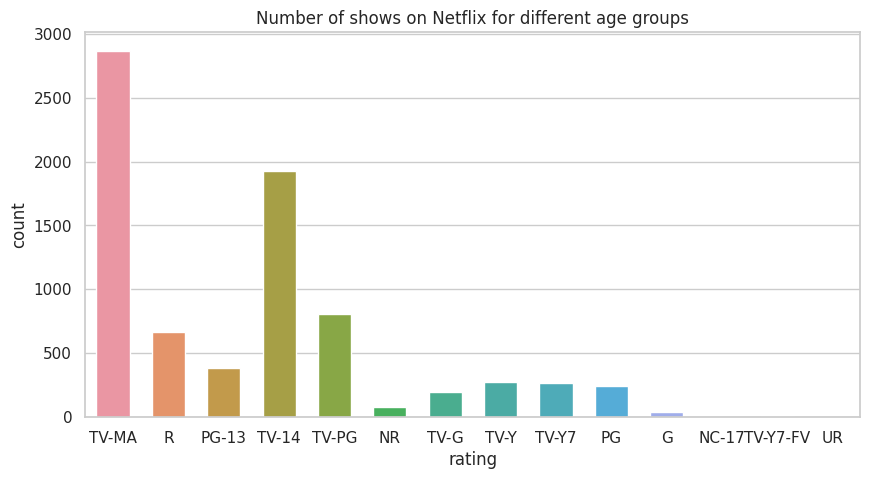

In [11]:
# Chart - 4 visualization code
# Set the style to white
sns.set(style="whitegrid")

# Number of shows on Netflix for different age groups
plt.subplots(figsize=(10, 5))
sns.countplot(x='rating', data=df, width = 0.6)
plt.title('Number of shows on Netflix for different age groups')

In [33]:
df['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Below are the insights we draw from the count plot of Number of shows on Netflix for different age groups:

1. The most common rating for shows on Netflix is 'TV-MA' (Mature Audience) with a count of 2868. This suggests that there is a significant amount of content intended for adult viewers with an age of 18 plus.
2. The second most common rating is 'TV-14' with a count of 1928. This indicates that there is also a considerable selection of shows suitable for teenagers and older children. THe Shows that falls in this are watched by an age group of 14 to 20.
3. The countplot provides a visual representation of the distribution of shows across different age groups, allowing for a quick understanding of the relative abundance of content for each rating category.


#### **Chart - 5**

In [12]:
# Chart - 5 visualization code
# Using Lambda function
# Extracting the year, month, and day information and storing them in new columns.
df['date_added']=pd.to_datetime(df['date_added'])
df['Year'] = df['date_added'].apply(lambda x: x.year)
df['Month'] = df['date_added'].apply(lambda x: x.month)
df['Day'] = df['date_added'].apply(lambda x: x.day)

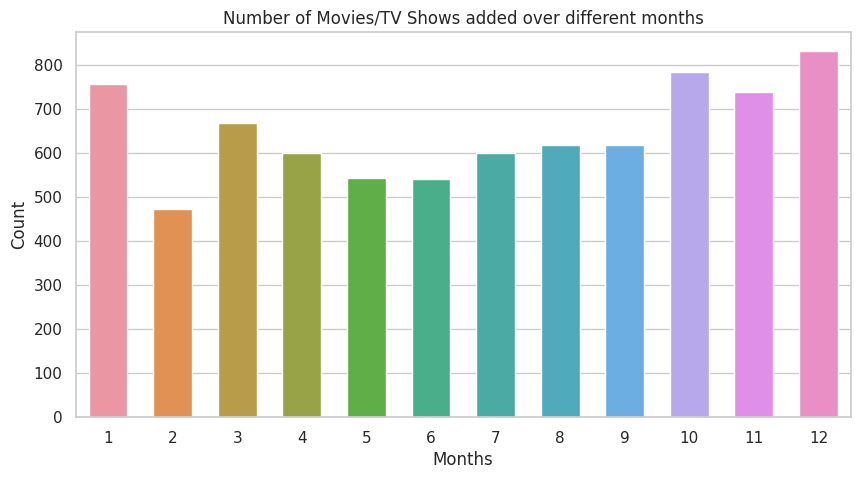

In [13]:
# Plotting a countplot for Number of Movies/TV Shows added over different months
plt.subplots(figsize=(10, 5))
sns.set(style="darkgrid")
sns.countplot(x='Month', data=df, width = 0.6)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Number of Movies/TV Shows added over different months')
plt.show()

**We plotted a countplot for distribution of movies released in each month. We draw the following insights:**

1. In the months starting from October to January the most number of Movies/TV Shows are been released. This period of 4 months can be called as the peak period for the entertainment industry.
2. The lowest number of movies are been released in the month of february. There is not a big difference between lowest and highest month of the release count of movies which shows that the release count of movies on Netflix is relatively consistent throughout the year. This suggests that Netflix does not show a significant seasonal pattern in terms of movie releases.


#### **Chart - 6**

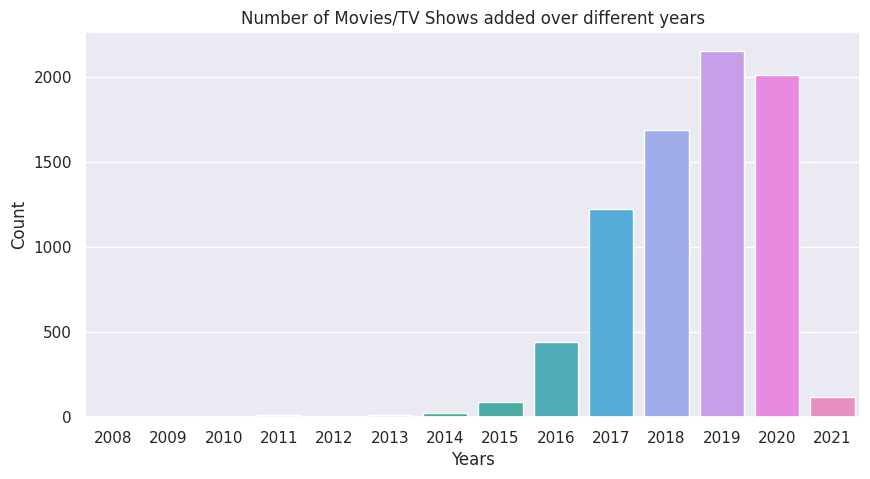

In [14]:
# Chart - 6 visualization code
# Plotting a countplot for Number of Movies/TV Shows added over different years
plt.subplots(figsize=(10, 5))
sns.set(style="darkgrid")
sns.countplot(x='Year', data=df)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Number of Movies/TV Shows added over different years')
plt.show()

**We plotted a countplot for distribution of movies released in each year. We draw the following insights:**

1. The highest number of movies/TV shows added to Netflix was in the year 2019 and the highest year is 2020.
2. We can observe a slight scale-down of shows in the year 2020 compared to 2019, and the most likely reason for this decline appears to be COVID-19.
3. From the years 2014 to 2019, there was exponential growth in the number of movies and TV shows released each year. This growth indicates that the content on Netflix is appreciated by the audience. The increasing number of releases reflects the growing demand for diverse and engaging content on the Netflix platform.

#### **Chart - 7**

In [15]:
# Chart - 7 visualization code
# Finding value counts of the column 'listed_in'
df['listed_in'].value_counts()[0:10]

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'Top 10 Movie Genre in the dataset')

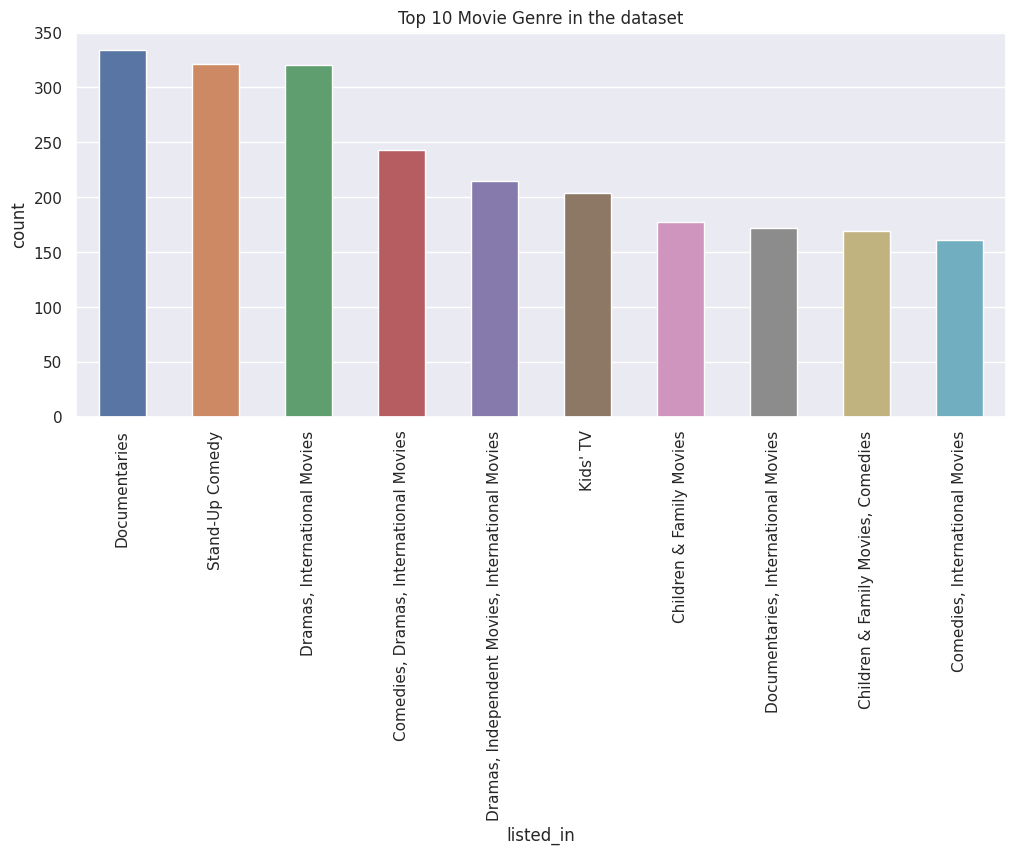

In [16]:
# Plotting countplot for Top 10 Movie Genre in the dataset
plt.figure(figsize=(12,5))
sns.countplot(x=df['listed_in'],data=df,order=df['listed_in'].value_counts().index[0:10], width = 0.5)
plt.xticks(rotation=90)
plt.title('Top 10 Movie Genre in the dataset')

**Following are the insights for the Top 10 Movie Genre in the dataset:**

1. Documentaries and Stand-Up Comedy are the most common genres: Documentaries and Stand-Up Comedy have the highest counts, with 334 and 321 occurrences, respectively. This suggests that there is a significant audience interest in factual content and comedic performances.
2. The combination of Dramas and International Movies appears in multiple variations in the top 10 genres, including "Dramas, International Movies," "Dramas, Independent Movies, International Movies," and "Comedies, Dramas, International Movies." This indicates a strong preference for emotionally engaging narratives and films from various cultures.
3. Children & Family Movies and Kids' TV are present in the top 10 genres, indicating a demand for content suitable for younger audiences. Combining Children & Family Movies with Comedies further emphasizes the interest in light-hearted, family-friendly entertainment.

#### **Chart - 8**

Text(0.5, 1.0, 'Distribution of movies and TV shows over different years')

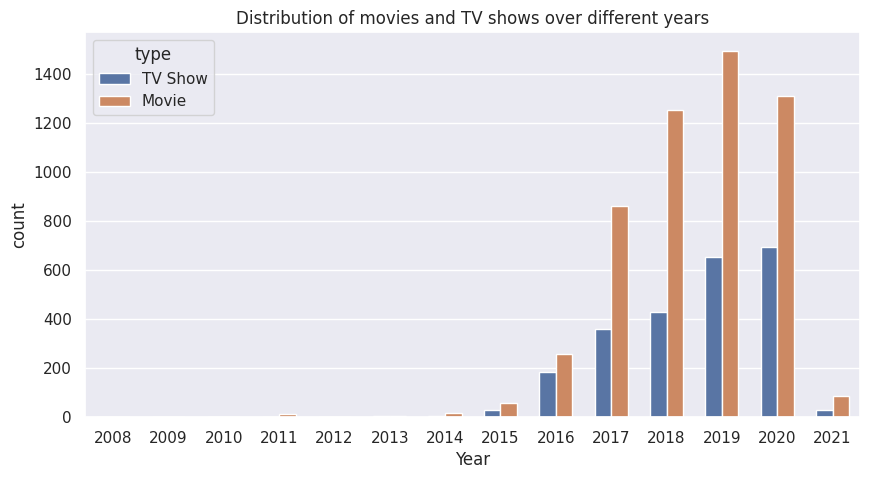

In [17]:
# Chart - 8 visualization code
# Plotting countplot for Distribution of movies and TV shows over different years
plt.figure(figsize=(10,5))
sns.countplot(x=df['Year'], hue=df['type'], width = 0.6)
plt.title('Distribution of movies and TV shows over different years')

We plotted a double bar graph of distribution of Movies and TV Shows for every year:

1. The difference between Movies and TV Shows is every high which shows that Movies are more in demand for the netflix audience,
2. The reason why movies are more preferred because Movies, typically featuring a self-contained narrative within a limited duration, may attract individuals who prefer a complete and immersive storytelling experience in a single sitting. On the other hand, TV shows with their episodic format and longer story arcs cater to viewers who enjoy ongoing engagement, character development, and the anticipation of new episodes.









#### **Chart - 9**

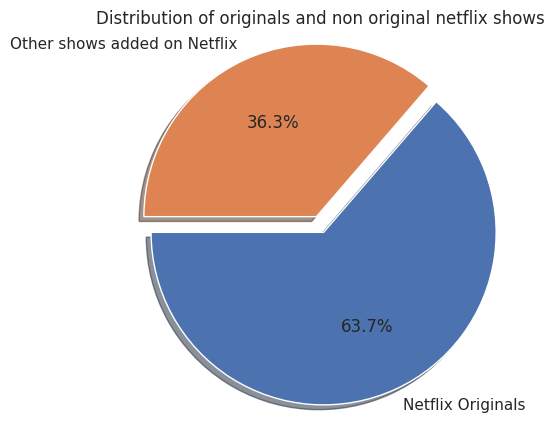

In [18]:
# Chart - 9 visualization code
# Pie Chart showing Distribution of originals and non original netflix shows
labels = 'Netflix Originals', 'Other shows added on Netflix'
df['Netflix Originals'] = np.where(df['release_year'] == df['Year'], 'Yes', 'No')
sizes = df['Netflix Originals'].value_counts()
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Distribution of originals and non original netflix shows")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

**The above Pie Chart shows:**

1. Netflix Originals which depicts 63.7% of the pie are the movies originally produced under Netflix production whereas rest of the pie are Other shows added on Netflix which is 36.3%.Netflix have bought rights of these kind of of to release it on their platform.
2. By acquiring rights to external shows, Netflix expands its offerings to cater to a wider range of audience preferences.
3. The dominance of Netflix Originals, comprising nearly two-thirds of the pie, highlights Netflix's strategic emphasis on producing and releasing its own content. This indicates that Netflix invests significantly in creating exclusive movies and shows, aiming to provide unique and engaging content to its subscribers.


#### **Chart - 10**

In [19]:
#Assigning the Ratings into grouped categories like 'Older Kids','Adults','Teens','Kids'.
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# Assigning the new 'target_ages' column with new rating as per above classification
df['target_ages'] = df['rating'].replace(ratings)

In [20]:
# Chart - 10 visualization code
# Grouped the DataFrame df by the 'country' column and summed the values of the 'count' column for each group
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:11]
data = data['country']

#Filtering the countries in the Dataframe
df_heatmap = df.loc[df['country'].isin(data)]

# Calculating a cross-tabulation between the 'country' and 'target_ages' columns
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
target_ages,,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.368889,0.77,0.469945,0.835821,0.512626,0.502942,0.320158
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.02,0.027322,0.022388,0.093434,0.073362,0.169960
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.07,0.120219,0.044776,0.204545,0.187132,0.235178
Teens,0.146893,0.683168,0.165217,0.567714,0.351111,0.14,0.382514,0.097015,0.189394,0.236563,0.274704


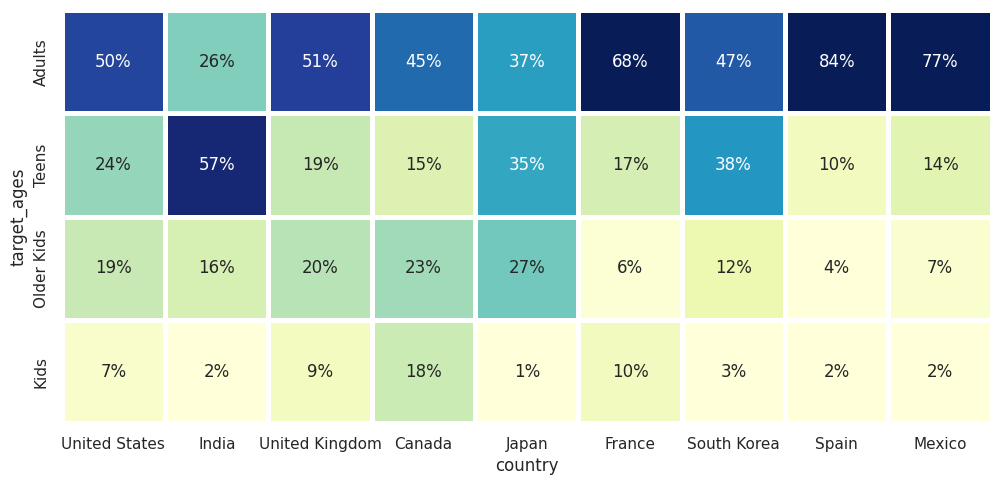

In [21]:
# Plotting the heatmap between target_ages and country
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

**The heatmap reveals that different countries exhibit distinct patterns in terms of target age preferences for content.**

1. Spain, Mexico, and France have a very high correlation with the 'Adults' target age category on the heatmap. This suggests that these countries have a significant proportion of content specifically tailored for adult audiences.
2. India has a very high correlation with the 'Teens' target age category on the heatmap, indicating that this country has a significant proportion of content specifically catered to teenage audiences. The strong correlation suggests that content tailored for teens is popular and in demand within India.
3. Canada is the country that exhibits a relatively balanced correlation across all target age groups on the heatmap. This suggests that content preferences in Canada are diverse and spread evenly across different age categories. Similarly we can see the variation for all the countries mentioned in the heatmap.

#### **Chart - 11**

In [ ]:
# Chart - 11 visualization code
movies = df[df['type']=='Movie']
movies

In [27]:
# Convert duration values to numeric (removing 'min' suffix)
movies = movies['duration'].str.replace(' min', '').astype(int)

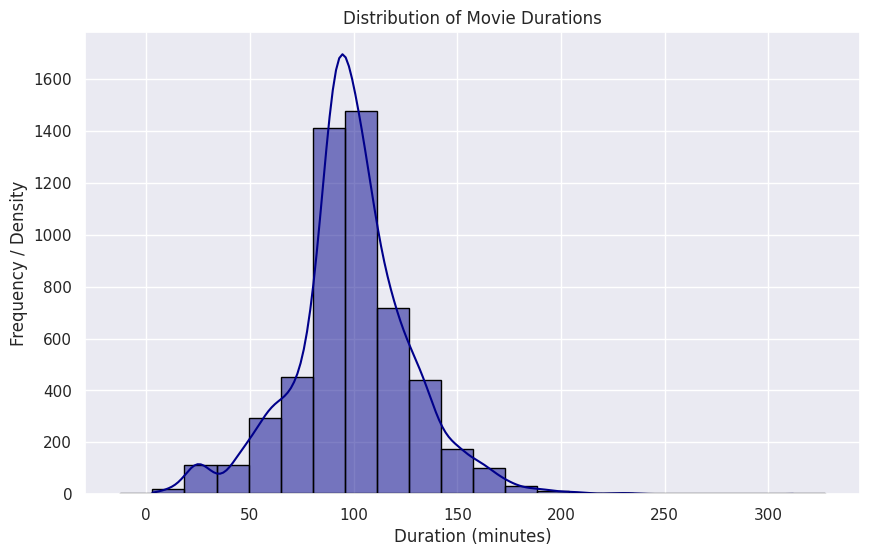

In [38]:
# Plotting histogram and KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(movies, bins=20, kde=True, color='darkblue', edgecolor='black')
sns.kdeplot(movies, color='black', linewidth=2)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Movie Durations')
plt.show()

Answer Here

#### **Chart - 12**

In [50]:
# Chart - 12 visualization code
df['duration'] = df[df['type']=='TV Show']['duration'].apply(lambda x: int(x.split()[0]))

Text(0.5, 1.0, 'Number of seasons per TV show distribution')

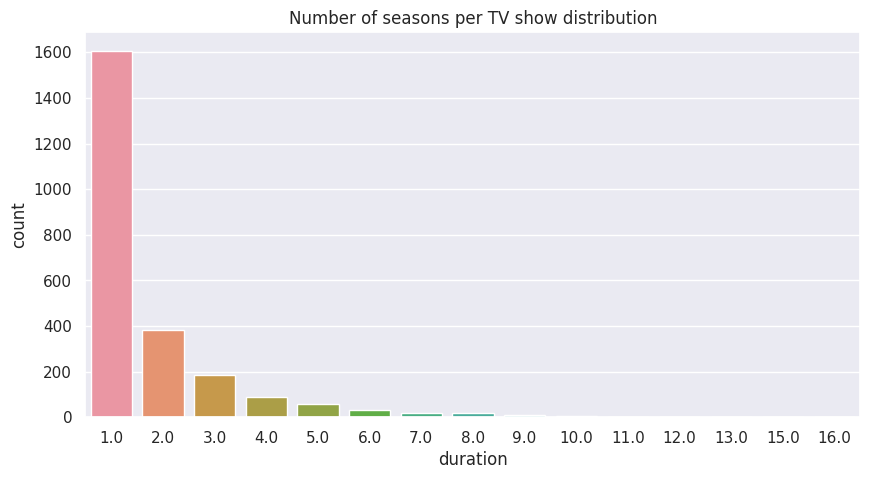

In [55]:
# Number of seasons for tv shows
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

Answer Here

#### **Chart - 13**

In [ ]:
# Chart - 13 visualization code

Answer Here

#### **Chart - 14**

In [ ]:
# Chart - 14 visualization code

Answer Here

#### **Chart - 15**

In [ ]:
# Chart - 15 visualization code

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

# ***Hypothetical Statement - 1***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 * ***HO: There is no significant difference in the distribution of release years between movies and TV shows on Netflix.***
 * ***H1: There is a significant difference in the distribution of release years between movies and TV shows on Netflix.***








#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value
#making copy of df_clean_frame
df_hypothesis=actual_df.copy()

In [57]:
from scipy.stats import chi2_contingency

release_year = df_hypothesis['release_year']
type = df_hypothesis['type']

In [58]:
# Creating a contingency table
contingency_table = pd.crosstab(release_year, type)

In [59]:
# Performing the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [62]:
# Printing the p-value
print("p-value:", p_value)

p-value: 1.7506909615749571e-60


In [60]:
# Setting the significance level
alpha = 0.05

In [63]:
# Checking if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis as there is a significant difference in the distribution of release years between movies and TV shows.")
else:
    print("Fail to reject the null hypothesis as there is no significant difference in the distribution of release years between movies and TV shows.")

Reject the null hypothesis as there is a significant difference in the distribution of release years between movies and TV shows.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

# ***Hypothetical Statement - 2***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 * ***HO: movies rated for kids and older kids are at least two hours long.***
 * ***H1: movies rated for kids and older kids are not at least two hours long.***








#### 2. Perform an appropriate statistical test.

In [103]:
# Perform Statistical Test to obtain P-Value
#making copy of df_clean_frame
df_hypothesis=actual_df.copy()

In [104]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [105]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [106]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [107]:
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [108]:
# Select the relevant subset of data for movies rated for kids and older kids
subset = df_hypothesis[df_hypothesis['target_ages'].isin(['Kids', 'Older Kids'])]

In [109]:
# Extract the duration of movies rated for kids and older kids
duration = subset['duration']

In [110]:
from scipy.stats import ttest_1samp

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(duration, 120, alternative='less')

# Print the p-value
print("p-value:", p_value)

p-value: 1.114832932563425e-177


In [111]:
# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis as Movies rated for kids and older kids are not at least two hours long.")
else:
    print("Fail to reject the null hypothesis as Movies rated for kids and older kids are at least two hours long.")

Reject the null hypothesis as Movies rated for kids and older kids are not at least two hours long.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### ***1. Handling Missing Values***

In [3]:
# creating a copy of actual dataset
netflix_df = actual_df.copy()

In [4]:
# Filling the missing values with an empty string
netflix_df.fillna('',inplace=True)

We created a copy of actual dataset to further proceed with Feature Engineering & Data Pre-processing. In handling missing values, we filled all the missing values with an empty string to ensure that all data points have a valid categorical representation, enabling compatibility with these algorithms.

### ***2. clustering attributes into a single column***

In [5]:
# Combining all the clustering attributes into a single column

netflix_df['clustering_attributes'] = (netflix_df['type'] + ' ' +
                                netflix_df['title'] + ' ' +
                                netflix_df['director'] + ' ' +
                                netflix_df['cast'] +' ' +
                                netflix_df['country'] +' ' +
                                netflix_df['listed_in'] +' ' +
                                netflix_df['description'])

We have clustered 7 different feaures into a single column named as clustering_attributes. The purpose of creating this new column 'clustering_attributes' is likely to create a consolidated representation of multiple attributes from the dataset that can be used as input for a clustering algorithm or further analysis. By combining these attributes into a single column, you can potentially capture relationships and patterns across multiple features in the dataset, enabling clustering or similarity-based analysis.

### ***3. Removing non-ASCII characters:***

In [6]:
# function to remove non-ascii characters
import unicodedata
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# remove non-ascii characters
netflix_df['clustering_attributes'] = remove_non_ascii(netflix_df['clustering_attributes'])

Removing non-ASCII characters refers to the process of eliminating any characters that are not part of the ASCII (American Standard Code for Information Interchange) character set from a text or string. The ASCII character set includes a range of 128 characters, including uppercase and lowercase letters, digits, punctuation marks, and control characters.

### ***4. Textual Data Preprocessing***
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

## ***Natural Language Processing(NLP)***

#### ***1. Expand Contraction***

In [7]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.2 MB/s eta 0:00:00


In [8]:
# Expand Contraction
import contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(expand_contractions)

#### ***2. Lower Casing***

In [9]:
# Lower Casing
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].str.lower()

#### ***3. Removing Punctuations***

In [10]:
# Remove Punctuations
# Function to remove punctuation from a string
import string
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Removing punctuation marks
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_punctuation)

#### ***4. Removing URLs & Removing words and digits contain digits***

In [11]:
# Remove URLs & Remove words and digits contain digits
# Function to remove URLs
import re
def remove_urls(text):
    return re.sub(r"http\S+|www\S+|https\S+", "", text)

# Remove URLs
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_urls)

In [12]:
# Function to remove words/digits containing digits
def remove_words_with_digits(text):
    return re.sub(r"\w*\d\w*", "", text)

# Remove words/digits containing digits
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_words_with_digits)

#### ***5. Removing Stopwords & Removing White spaces***

In [13]:
# Remove Stopwords
# Function to remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Remove stopwords
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# Remove White spaces
def remove_whitespace(text):
    return " ".join(text.split())

# Remove whitespace
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_whitespace)

#### ***6. Lemmatization***

In [15]:
# Lemmatization words
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatize_verbs(words):

    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

# Lemmatization
netflix_df['clustering_attributes'] = lemmatize_verbs(netflix_df['clustering_attributes'])

[nltk_data] Downloading package wordnet to /root/nltk_data...


* From Natural Language Toolkit(NLTK) library we downloaded the WordNet corpus and imported the WordNetLemmatizer class from the nltk.stem module which is the requirement for the lemmatization process.

* In lemmatization process we defined a function 'lemmatize_verbs' which takes a list of words as input and returns a list of lemmatized words. We applied this technique on the 'clustering_attributes' variable. The purpose of this NLP technique is to perform lemmatization specifically for verbs. It initializes the lemmatizer, applies it to each word in the input list, and returns a list of lemmatized verbs.

#### ***7. Tokenization***

In [16]:
# Tokenization
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

#### ***4.8. Text Vectorization***

In [20]:
# Vectorizing Text
# clustering tokens saved in a variable
clustering_data = netflix_df['clustering_attributes']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [22]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 248366 stored elements in Compressed Sparse Row format>

In [23]:
# Shape of X
X.shape

(7787, 20000)

In [24]:
# convert X into array form for clustering
X = X.toarray()

### ***5. Dimesionality Reduction***

## ***Feature Extraction by Principle Component Analysis (PCA)***


In [25]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

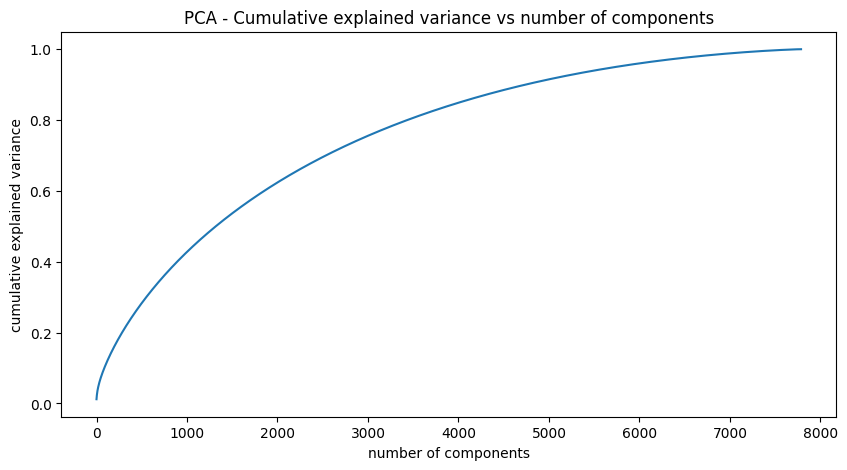

In [26]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [27]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [28]:
# transformed features
x_pca = pca.transform(X)

In [29]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

Answer Here.

## ***7. ML Model Implementation***

### **ML Model - 1 - K-Means Clustering**

In [30]:
# ML Model - 1 Implementation
# Finding value of wcss for 1 to 30 range of number of clusters
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,31):
  km = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  km.fit(x_pca)
  wcss.append(km.inertia_)

In [31]:
# we stored clusters and wcss score in a dataframe
k = range(1,31)
df1 = pd.DataFrame({'Clusters': k, 'WCSS': wcss})
df1

,Clusters,WCSS
0,1,6489.678058
1,2,6410.493867
2,3,6389.855896
3,4,6373.385785
4,5,6357.660672
5,6,6344.341802
6,7,6328.427087
7,8,6323.977424
8,9,6310.834289
9,10,6299.547217


Text(0, 0.5, 'WCSS')

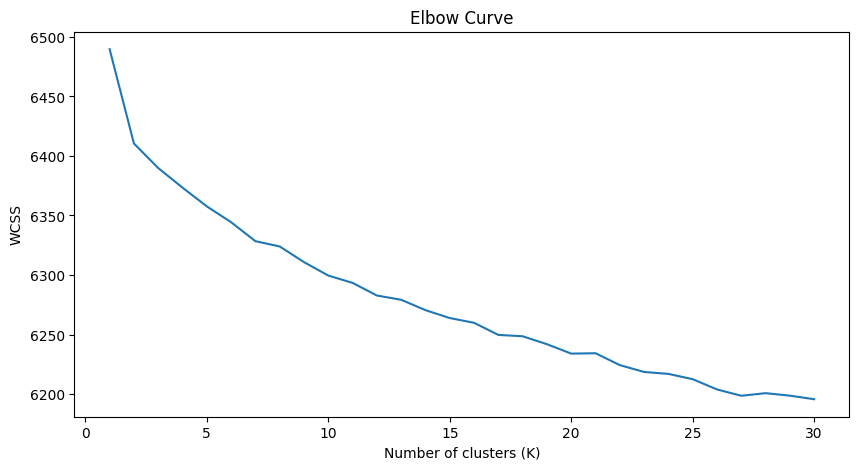

In [32]:
# Plotting an Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(k,wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')

In [33]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill_score = []
for i in range(2,31):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(x_pca)
    cluster_labels = model.labels_

    # silhouette score
    score = silhouette_score(x_pca, cluster_labels)
    sill_score.append(score)
    print('cluster: %d \t Silhouette: %0.4f'%(i,score))

cluster: 2 	 Silhouette: 0.0086
cluster: 3 	 Silhouette: 0.0092
cluster: 4 	 Silhouette: 0.0032
cluster: 5 	 Silhouette: 0.0043
cluster: 6 	 Silhouette: -0.0015
cluster: 7 	 Silhouette: -0.0011
cluster: 8 	 Silhouette: 0.0006
cluster: 9 	 Silhouette: 0.0006
cluster: 10 	 Silhouette: 0.0008
cluster: 11 	 Silhouette: 0.0020
cluster: 12 	 Silhouette: 0.0017
cluster: 13 	 Silhouette: 0.0032
cluster: 14 	 Silhouette: 0.0034
cluster: 15 	 Silhouette: 0.0035
cluster: 16 	 Silhouette: 0.0027
cluster: 17 	 Silhouette: 0.0038
cluster: 18 	 Silhouette: 0.0033
cluster: 19 	 Silhouette: 0.0037
cluster: 20 	 Silhouette: 0.0045
cluster: 21 	 Silhouette: 0.0044
cluster: 22 	 Silhouette: 0.0045
cluster: 23 	 Silhouette: 0.0044
cluster: 24 	 Silhouette: 0.0052
cluster: 25 	 Silhouette: 0.0058
cluster: 26 	 Silhouette: 0.0050
cluster: 27 	 Silhouette: 0.0052
cluster: 28 	 Silhouette: 0.0044
cluster: 29 	 Silhouette: 0.0062
cluster: 30 	 Silhouette: 0.0061


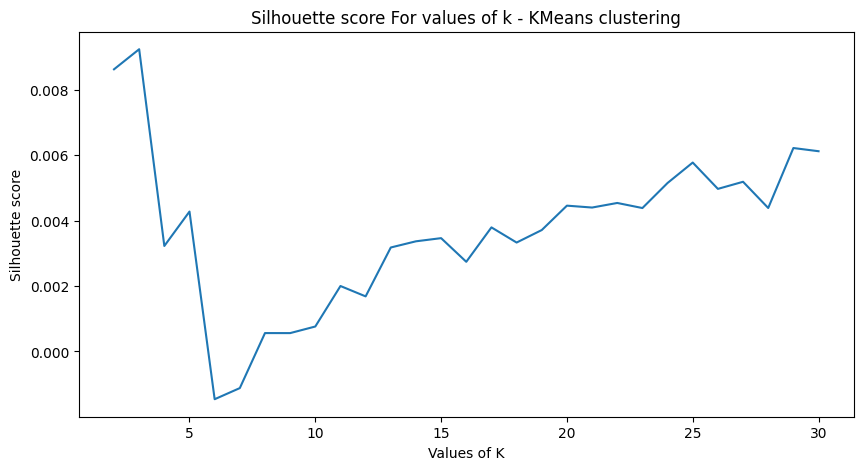

In [34]:
# Plotting the Sillhouette score graph
plt.figure(figsize=(10,5))
plt.plot(range(2,31),sill_score)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette score For values of k - KMeans clustering')
plt.show()

In [78]:
# Clustering the data into 3 clusters
km = KMeans(n_clusters=3,init='k-means++',random_state=33)
km.fit(x_pca)

KMeans(n_clusters=3, random_state=33)

In [79]:
# Evaluation metrics - distortion, Silhouette score
#Predict the clusters and evaluate the silhouette score
kmeans_distortion = km.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, km.labels_)
print((kmeans_distortion,kmeans_silhouette_score))

(6389.851259209302, 0.009312704736791452)


In [80]:
# Adding a kmeans cluster number attribute
netflix_df['kmeans_cluster'] = km.labels_

In [81]:
netflix_df['kmeans_cluster'].value_counts()

0    3334
2    2352
1    2101
Name: kmeans_cluster, dtype: int64

Text(0.5, 1.0, 'Number of movies and TV shows in each cluster - Kmeans Clustering')

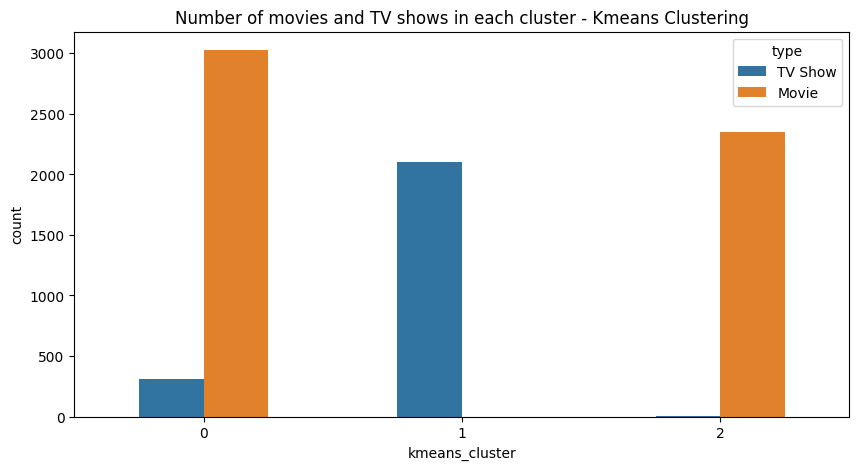

In [85]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=netflix_df, hue='type', width = 0.5)
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

### **ML Model - 2 - Hierarchical Clustering**

Text(0, 0.5, 'Distance')

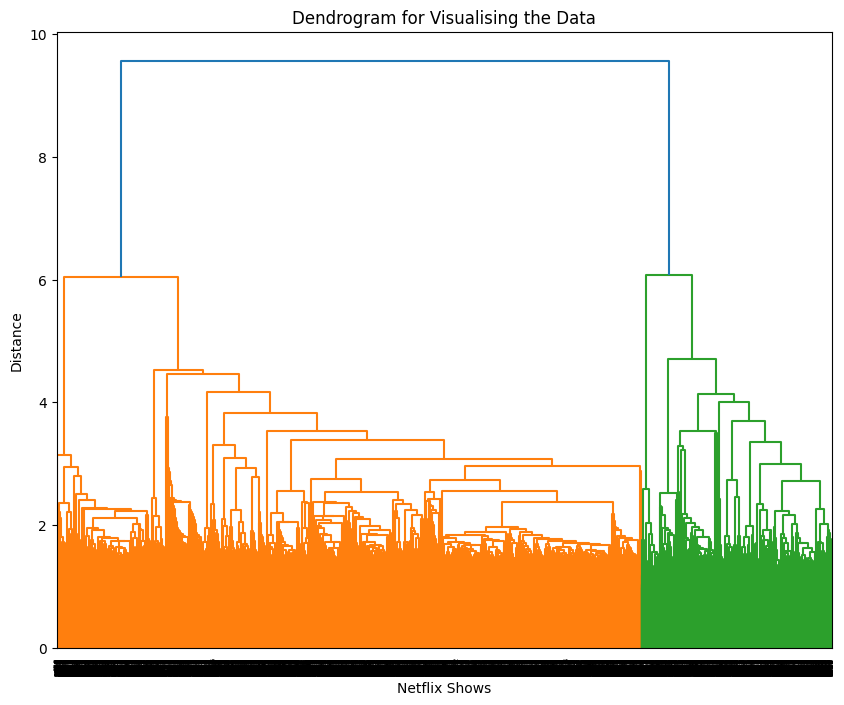

In [40]:
# Creating a Dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(10, 8))
Dendrogram = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram for Visualising the Data')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')

In [71]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg_clustering.fit(x_pca)

AgglomerativeClustering(affinity='euclidean')

In [72]:
# Adding a kmeans cluster number attribute to predict the model
netflix_df['hierarchical_cluster'] = agg_clustering.labels_

In [73]:
netflix_df['hierarchical_cluster'].value_counts()

1    5875
0    1912
Name: hierarchical_cluster, dtype: int64

Text(0.5, 1.0, 'Number of movies and tv shows in each cluster - Hierarchical Clustering')

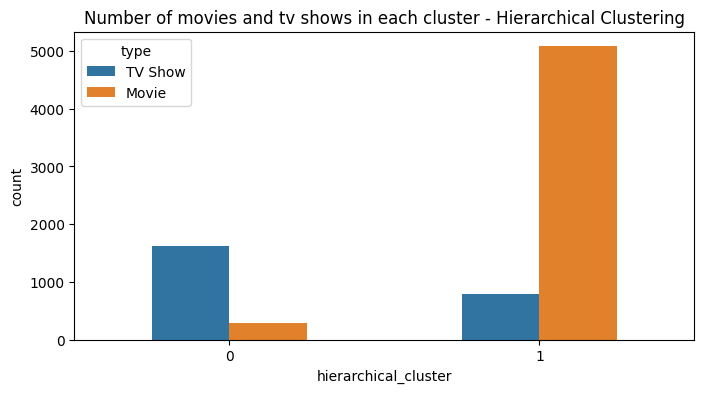

In [74]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,4))
q = sns.countplot(x='hierarchical_cluster',data=netflix_df, hue='type', width = 0.5)
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

In [75]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(x_pca, netflix_df['hierarchical_cluster'], metric='euclidean')

In [76]:
# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.003556443674071377


In [77]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin score
davies_bouldin = davies_bouldin_score(x_pca, netflix_df['hierarchical_cluster'])

# Print the Davies-Bouldin score
print("Davies-Bouldin Score:", davies_bouldin)

Davies-Bouldin Score: 10.152378558313659


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***